# Table of Contents
 <p><div class="lev1"><a href="#Select-the-Wave-Curve"><span class="toc-item-num">1&nbsp;&nbsp;</span>Select the Wave Curve</a></div>

# Select the Wave Curve

In [1]:
from matplotlib import pyplot as plt
from collections import defaultdict

import matplotlib
import numpy as np
import pandas as pd
import peakutils
import sys

In [2]:
# local
sys.path.insert(0, '../')
from pywim.utils.dsp.synthetic_data.sensor_data import gen_analog_data

In [3]:
plt.style.use('ggplot')
%matplotlib inline
"""
plt.grid(True)
plt.legend(True)
plt.xticks(rotation=45)
plt.tight_layout()
"""
None

In [4]:
data = gen_analog_data(
    sample_rate=5000, speed=15.0, vehicle_layout='-o-o---o---o-', 
    sensors_distance=[2],
    p_signal_noise=10
)

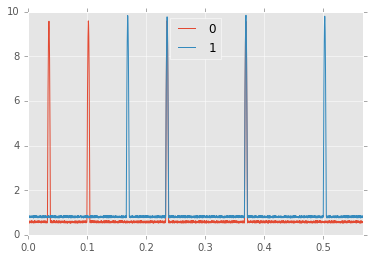

In [5]:
data.plot()
plt.show()

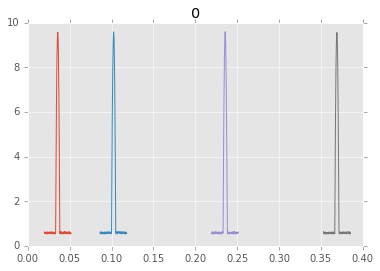

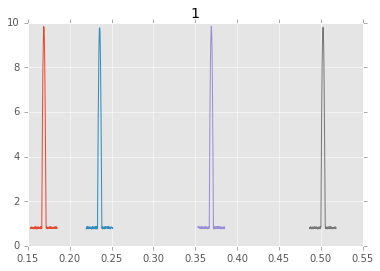

In [8]:
curves = defaultdict(list)

for k in data.keys():
    y = data[k].values
    indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
    
    for ind_axle in indexes:
        curves[k].append(data[k].iloc[ind_axle-80:ind_axle+80])

for k in curves.keys():
    for i_curve, v_curve in enumerate(curves[k]):
        plt.plot(v_curve, label=i_curve)
    plt.title('%s' % k)
    plt.show()